# BASE vs TEPLO by-layer differences

In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import arrow
import glob
import sys
sys.path.append('../RIVERS_pilot//bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
import extract_bylayer_mean as ebm
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

In [14]:
reload(ebmBOX)
reload(ebm)

<module 'extract_bylayer_mean' from '../RIVERS_pilot//bylayer_extract/extract_bylayer_mean.py'>

### [A] Map definition and station definition

In [15]:


# w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
# pco2 = w['model_output']['pCO2'][:]
# pco2[pco2>2e5] = np.nan
# pco2[pco2<2000] = 500
# fact = 1.5
# fig = plt.figure(figsize=(12*fact,6.5*fact))

# ax0 = fig.add_subplot(1,2,1)
# #toba and bute

# im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
# viz_tools.set_aspect(ax0)
# #jdf
# rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
# ax0.add_patch(rect_jdf)

# rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
# ax0.add_patch(rect_haro)

# rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
# ax0.add_patch(rect_cs)

# rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
# ax0.add_patch(rect_ns)

# ax0.set_title('individual stations')




reload(ebmBOX)

    # reload(ebmBOX)

    # #(start, end, ftype, sdir, varname, fname, y, x)
    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = pkldir + 'BR3_DIC_means_cs2_BOX'
    # y = cs2_y; x = cs2_x
    # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

run for PI4, BR3 for the above 12 stations, usage case above


## extractions in ebmBOX_and_ebm_BASE.ipynb and ebmBOX_and_ebm_SHIFT.ipynb

#### LOAD PKLS OF ABOVE EXTRACTED QUANTITIES

In [16]:
#extract means for BR1-BR3, get fraser discharge
#var

BASE_DIC = pickle.load(open('../RIVERS_pilot/pkls/BASE_DIC_means_inletsIN.pkl' , 'rb')) 
TEPLO_DIC = pickle.load(open('./pkls/TEPLO_DIC_means_inletsIN.pkl' , 'rb')) 

BASE_DIC[BASE_DIC == 0] = np.nan
TEPLO_DIC[TEPLO_DIC == 0] = np.nan

BASE_diat = pickle.load(open('./pkls/BASE_diat_means_inletsIN.pkl' , 'rb')) 
TEPLO_diat = pickle.load(open('./pkls/TEPLO_diat_means_inletsIN.pkl' , 'rb')) 

BASE_diat[BASE_diat == 0] = np.nan
TEPLO_diat[TEPLO_diat == 0] = np.nan

BASE_temp = pickle.load(open('./pkls/BASE_temp_means_inletsIN.pkl' , 'rb')) 
TEPLO_temp = pickle.load(open('./pkls/TEPLO_temp_means_inletsIN.pkl' , 'rb')) 

BASE_temp[BASE_temp == 0] = np.nan
TEPLO_temp[TEPLO_temp == 0] = np.nan

mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run


#### load all DIC data for SHIFT and BASE 

In [17]:
BASE_DIC_jdf = pickle.load(open('./pkls/BASE_DIC_means_jdf_BOX.pkl','rb'))
TEPLO_DIC_jdf = pickle.load(open('./pkls/TEPLO_DIC_means_jdf_BOX.pkl','rb'))
BASE_DIC_cs = pickle.load(open('./pkls/BASE_DIC_means_cs_BOX.pkl','rb'))
TEPLO_DIC_cs = pickle.load(open('./pkls/TEPLO_DIC_means_cs_BOX.pkl','rb'))
BASE_DIC_ns = pickle.load(open('./pkls/BASE_DIC_means_ns_BOX.pkl','rb'))
TEPLO_DIC_ns = pickle.load(open('./pkls/TEPLO_DIC_means_ns_BOX.pkl','rb'))
BASE_DIC_haro = pickle.load(open('./pkls/BASE_DIC_means_haro_BOX.pkl','rb'))
TEPLO_DIC_haro = pickle.load(open('./pkls/TEPLO_DIC_means_haro_BOX.pkl','rb'))

BASE_DIC_jdf2 = pickle.load(open('./pkls/BASE_DIC_means_jdf2_BOX.pkl','rb'))
TEPLO_DIC_jdf2 = pickle.load(open('./pkls/TEPLO_DIC_means_jdf2_BOX.pkl','rb'))
BASE_DIC_cs2 = pickle.load(open('./pkls/BASE_DIC_means_cs2_BOX.pkl','rb'))
TEPLO_DIC_cs2 = pickle.load(open('./pkls/TEPLO_DIC_means_cs2_BOX.pkl','rb'))
BASE_DIC_ns2 = pickle.load(open('./pkls/BASE_DIC_means_ns2_BOX.pkl','rb'))
TEPLO_DIC_ns2 = pickle.load(open('./pkls/TEPLO_DIC_means_ns2_BOX.pkl','rb'))
BASE_DIC_haro2 = pickle.load(open('./pkls/BASE_DIC_means_haro2_BOX.pkl','rb'))
TEPLO_DIC_haro2 = pickle.load(open('./pkls/TEPLO_DIC_means_haro2_BOX.pkl','rb'))

BASE_DIC_jdf3 = pickle.load(open('./pkls/BASE_DIC_means_jdf3_BOX.pkl','rb'))
TEPLO_DIC_jdf3 = pickle.load(open('./pkls/TEPLO_DIC_means_jdf3_BOX.pkl','rb'))
BASE_DIC_cs3 = pickle.load(open('./pkls/BASE_DIC_means_cs3_BOX.pkl','rb'))
TEPLO_DIC_cs3 = pickle.load(open('./pkls/TEPLO_DIC_means_cs3_BOX.pkl','rb'))
BASE_DIC_ns3 = pickle.load(open('./pkls/BASE_DIC_means_ns3_BOX.pkl','rb'))
TEPLO_DIC_ns3 = pickle.load(open('./pkls/TEPLO_DIC_means_ns3_BOX.pkl','rb'))
BASE_DIC_haro3 = pickle.load(open('./pkls/BASE_DIC_means_haro3_BOX.pkl','rb'))
TEPLO_DIC_haro3 = pickle.load(open('./pkls/TEPLO_DIC_means_haro3_BOX.pkl','rb'))

BASE_temp_jdf = pickle.load(open('./pkls/BASE_temp_means_jdf_BOX.pkl','rb'))
TEPLO_temp_jdf = pickle.load(open('./pkls/TEPLO_temp_means_jdf_BOX.pkl','rb'))
BASE_temp_cs = pickle.load(open('./pkls/BASE_temp_means_cs_BOX.pkl','rb'))
TEPLO_temp_cs = pickle.load(open('./pkls/TEPLO_temp_means_cs_BOX.pkl','rb'))
BASE_temp_ns = pickle.load(open('./pkls/BASE_temp_means_ns_BOX.pkl','rb'))
TEPLO_temp_ns = pickle.load(open('./pkls/TEPLO_temp_means_ns_BOX.pkl','rb'))
BASE_temp_haro = pickle.load(open('./pkls/BASE_temp_means_haro_BOX.pkl','rb'))
TEPLO_temp_haro = pickle.load(open('./pkls/TEPLO_temp_means_haro_BOX.pkl','rb'))

BASE_temp_jdf2 = pickle.load(open('./pkls/BASE_temp_means_jdf2_BOX.pkl','rb'))
TEPLO_temp_jdf2 = pickle.load(open('./pkls/TEPLO_temp_means_jdf2_BOX.pkl','rb'))
BASE_temp_cs2 = pickle.load(open('./pkls/BASE_temp_means_cs2_BOX.pkl','rb'))
TEPLO_temp_cs2 = pickle.load(open('./pkls/TEPLO_temp_means_cs2_BOX.pkl','rb'))
BASE_temp_ns2 = pickle.load(open('./pkls/BASE_temp_means_ns2_BOX.pkl','rb'))
TEPLO_temp_ns2 = pickle.load(open('./pkls/TEPLO_temp_means_ns2_BOX.pkl','rb'))
BASE_temp_haro2 = pickle.load(open('./pkls/BASE_temp_means_haro2_BOX.pkl','rb'))
TEPLO_temp_haro2 = pickle.load(open('./pkls/TEPLO_temp_means_haro2_BOX.pkl','rb'))

BASE_temp_jdf3 = pickle.load(open('./pkls/BASE_temp_means_jdf3_BOX.pkl','rb'))
TEPLO_temp_jdf3 = pickle.load(open('./pkls/TEPLO_temp_means_jdf3_BOX.pkl','rb'))
BASE_temp_cs3 = pickle.load(open('./pkls/BASE_temp_means_cs3_BOX.pkl','rb'))
TEPLO_temp_cs3 = pickle.load(open('./pkls/TEPLO_temp_means_cs3_BOX.pkl','rb'))
BASE_temp_ns3 = pickle.load(open('./pkls/BASE_temp_means_ns3_BOX.pkl','rb'))
TEPLO_temp_ns3 = pickle.load(open('./pkls/TEPLO_temp_means_ns3_BOX.pkl','rb'))
BASE_temp_haro3 = pickle.load(open('./pkls/BASE_temp_means_haro3_BOX.pkl','rb'))
TEPLO_temp_haro3 = pickle.load(open('./pkls/TEPLO_temp_means_haro3_BOX.pkl','rb'))

BASE_diat_jdf = pickle.load(open('./pkls/BASE_diat_means_jdf_BOX.pkl','rb'))
TEPLO_diat_jdf = pickle.load(open('./pkls/TEPLO_diat_means_jdf_BOX.pkl','rb'))
BASE_diat_cs = pickle.load(open('./pkls/BASE_diat_means_cs_BOX.pkl','rb'))
TEPLO_diat_cs = pickle.load(open('./pkls/TEPLO_diat_means_cs_BOX.pkl','rb'))
BASE_diat_ns = pickle.load(open('./pkls/BASE_diat_means_ns_BOX.pkl','rb'))
TEPLO_diat_ns = pickle.load(open('./pkls/TEPLO_diat_means_ns_BOX.pkl','rb'))
BASE_diat_haro = pickle.load(open('./pkls/BASE_diat_means_haro_BOX.pkl','rb'))
TEPLO_diat_haro = pickle.load(open('./pkls/TEPLO_diat_means_haro_BOX.pkl','rb'))

BASE_diat_jdf2 = pickle.load(open('./pkls/BASE_diat_means_jdf2_BOX.pkl','rb'))
TEPLO_diat_jdf2 = pickle.load(open('./pkls/TEPLO_diat_means_jdf2_BOX.pkl','rb'))
BASE_diat_cs2 = pickle.load(open('./pkls/BASE_diat_means_cs2_BOX.pkl','rb'))
TEPLO_diat_cs2 = pickle.load(open('./pkls/TEPLO_diat_means_cs2_BOX.pkl','rb'))
BASE_diat_ns2 = pickle.load(open('./pkls/BASE_diat_means_ns2_BOX.pkl','rb'))
TEPLO_diat_ns2 = pickle.load(open('./pkls/TEPLO_diat_means_ns2_BOX.pkl','rb'))
BASE_diat_haro2 = pickle.load(open('./pkls/BASE_diat_means_haro2_BOX.pkl','rb'))
TEPLO_diat_haro2 = pickle.load(open('./pkls/TEPLO_diat_means_haro2_BOX.pkl','rb'))

BASE_diat_jdf3 = pickle.load(open('./pkls/BASE_diat_means_jdf3_BOX.pkl','rb'))
TEPLO_diat_jdf3 = pickle.load(open('./pkls/TEPLO_diat_means_jdf3_BOX.pkl','rb'))
BASE_diat_cs3 = pickle.load(open('./pkls/BASE_diat_means_cs3_BOX.pkl','rb'))
TEPLO_diat_cs3 = pickle.load(open('./pkls/TEPLO_diat_means_cs3_BOX.pkl','rb'))
BASE_diat_ns3 = pickle.load(open('./pkls/BASE_diat_means_ns3_BOX.pkl','rb'))
TEPLO_diat_ns3 = pickle.load(open('./pkls/TEPLO_diat_means_ns3_BOX.pkl','rb'))
BASE_diat_haro3 = pickle.load(open('./pkls/BASE_diat_means_haro3_BOX.pkl','rb'))
TEPLO_diat_haro3 = pickle.load(open('./pkls/TEPLO_diat_means_haro3_BOX.pkl','rb'))



### [B] nice plot - PI5

Text(0.5, 1.0, 'individual stations')

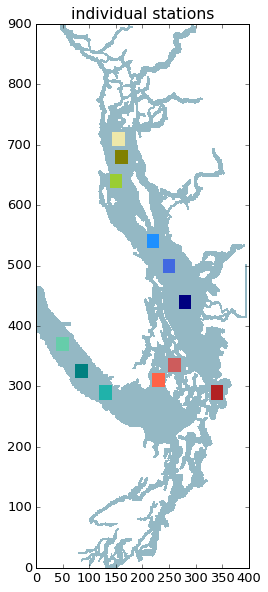

In [18]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

ax0.set_title('individual stations')



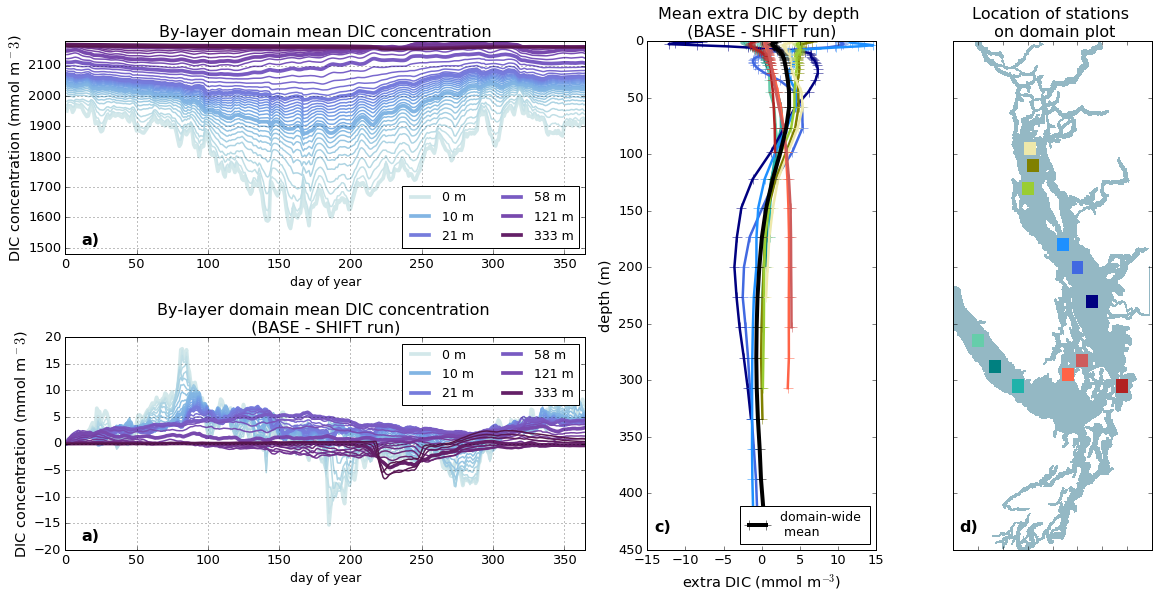

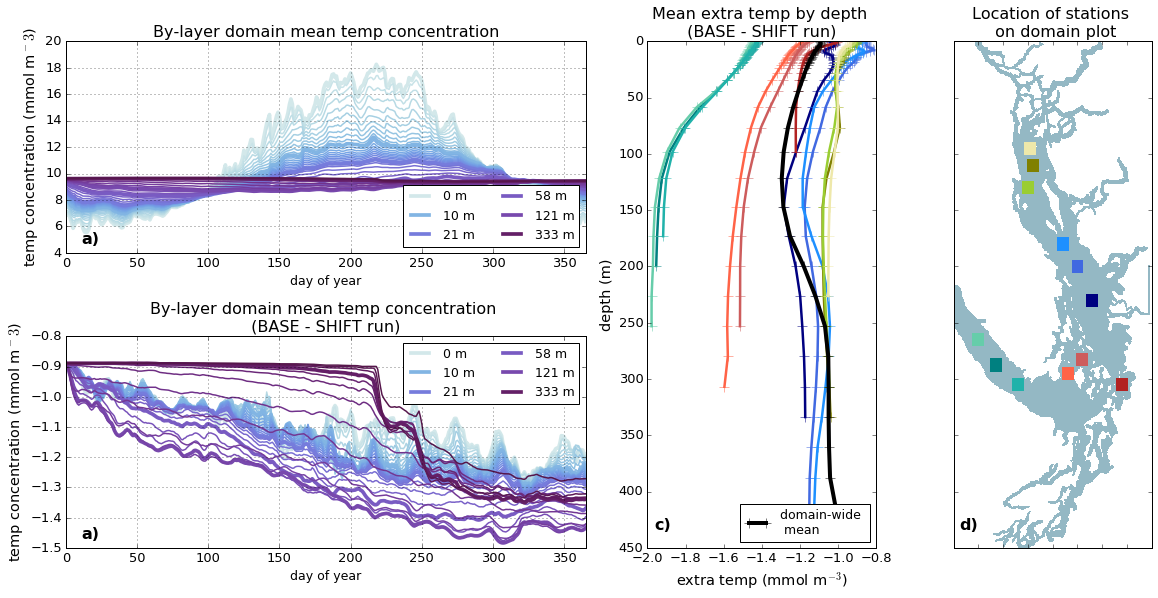

In [22]:
ts = 16 # title font
fs = 14.5 # all other font sizes
fact = 1
lw = 1.5
fig = plt.figure(figsize=(16.5*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_temp[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_temp[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])
#plt.ylim([1480,2180])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('temp concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean temp concentration', fontsize = ts)


ax1 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_temp[i,:]-TEPLO_temp[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_temp[i,:]-TEPLO_temp[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'upper right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])

plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('temp concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean temp concentration \n (BASE - SHIFT run) ', fontsize = ts)
ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BASE_dp = np.nanmean(BASE_temp, axis =1)
TEPLO_dp = np.nanmean(TEPLO_temp, axis =1)

BASE_jdf_dp = np.nanmean(BASE_temp_jdf, axis =1)
TEPLO_jdf_dp = np.nanmean(TEPLO_temp_jdf, axis =1)
BASE_cs_dp = np.nanmean(BASE_temp_cs, axis =1)
TEPLO_cs_dp = np.nanmean(TEPLO_temp_cs, axis =1)
BASE_ns_dp = np.nanmean(BASE_temp_ns, axis =1)
TEPLO_ns_dp = np.nanmean(TEPLO_temp_ns, axis =1)
BASE_haro_dp = np.nanmean(BASE_temp_haro, axis =1)
TEPLO_haro_dp = np.nanmean(TEPLO_temp_haro, axis =1)

BASE_jdf2_dp = np.nanmean(BASE_temp_jdf2, axis =1)
TEPLO_jdf2_dp = np.nanmean(TEPLO_temp_jdf2, axis =1)
BASE_cs2_dp = np.nanmean(BASE_temp_cs2, axis =1)
TEPLO_cs2_dp = np.nanmean(TEPLO_temp_cs2, axis =1)
BASE_ns2_dp = np.nanmean(BASE_temp_ns2, axis =1)
TEPLO_ns2_dp = np.nanmean(TEPLO_temp_ns2, axis =1)
BASE_haro2_dp = np.nanmean(BASE_temp_haro2, axis =1)
TEPLO_haro2_dp = np.nanmean(TEPLO_temp_haro2, axis =1)

BASE_jdf3_dp = np.nanmean(BASE_temp_jdf3, axis =1)
TEPLO_jdf3_dp = np.nanmean(TEPLO_temp_jdf3, axis =1)
BASE_cs3_dp = np.nanmean(BASE_temp_cs3, axis =1)
TEPLO_cs3_dp = np.nanmean(TEPLO_temp_cs3, axis =1)
BASE_ns3_dp = np.nanmean(BASE_temp_ns3, axis =1)
TEPLO_ns3_dp = np.nanmean(TEPLO_temp_ns3, axis =1)
BASE_haro3_dp = np.nanmean(BASE_temp_haro3, axis =1)
TEPLO_haro3_dp = np.nanmean(TEPLO_temp_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   

ax3.plot(BASE_jdf_dp-TEPLO_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf2_dp-TEPLO_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf3_dp-TEPLO_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BASE_cs_dp-TEPLO_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs2_dp-TEPLO_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs3_dp-TEPLO_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BASE_ns_dp-TEPLO_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns2_dp-TEPLO_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns3_dp-TEPLO_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BASE_haro_dp-TEPLO_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro2_dp-TEPLO_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro3_dp-TEPLO_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BASE_dp-TEPLO_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')


ax3.set_title('Mean extra temp by depth \n (BASE - SHIFT run) ', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra temp (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title('Location of stations \n on domain plot', fontsize = ts)

ax4.text(0.03, 0.03, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


fig.tight_layout()
#plt.savefig('Fig2.png')





In [ ]:
ts = 16 # title font
fs = 14.5 # all other font sizes
fact = 1
lw = 1.5
fig = plt.figure(figsize=(16.5*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_DIC[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_DIC[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])
plt.ylim([1480,2180])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax1 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_DIC[i,:]-TEPLO_DIC[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_DIC[i,:]-TEPLO_DIC[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'upper right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])

plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration \n (BASE - SHIFT run) ', fontsize = ts)
ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BASE_dp = np.nanmean(BASE_DIC, axis =1)
TEPLO_dp = np.nanmean(TEPLO_DIC, axis =1)

BASE_jdf_dp = np.nanmean(BASE_DIC_jdf, axis =1)
TEPLO_jdf_dp = np.nanmean(TEPLO_DIC_jdf, axis =1)
BASE_cs_dp = np.nanmean(BASE_DIC_cs, axis =1)
TEPLO_cs_dp = np.nanmean(TEPLO_DIC_cs, axis =1)
BASE_ns_dp = np.nanmean(BASE_DIC_ns, axis =1)
TEPLO_ns_dp = np.nanmean(TEPLO_DIC_ns, axis =1)
BASE_haro_dp = np.nanmean(BASE_DIC_haro, axis =1)
TEPLO_haro_dp = np.nanmean(TEPLO_DIC_haro, axis =1)

BASE_jdf2_dp = np.nanmean(BASE_DIC_jdf2, axis =1)
TEPLO_jdf2_dp = np.nanmean(TEPLO_DIC_jdf2, axis =1)
BASE_cs2_dp = np.nanmean(BASE_DIC_cs2, axis =1)
TEPLO_cs2_dp = np.nanmean(TEPLO_DIC_cs2, axis =1)
BASE_ns2_dp = np.nanmean(BASE_DIC_ns2, axis =1)
TEPLO_ns2_dp = np.nanmean(TEPLO_DIC_ns2, axis =1)
BASE_haro2_dp = np.nanmean(BASE_DIC_haro2, axis =1)
TEPLO_haro2_dp = np.nanmean(TEPLO_DIC_haro2, axis =1)

BASE_jdf3_dp = np.nanmean(BASE_DIC_jdf3, axis =1)
TEPLO_jdf3_dp = np.nanmean(TEPLO_DIC_jdf3, axis =1)
BASE_cs3_dp = np.nanmean(BASE_DIC_cs3, axis =1)
TEPLO_cs3_dp = np.nanmean(TEPLO_DIC_cs3, axis =1)
BASE_ns3_dp = np.nanmean(BASE_DIC_ns3, axis =1)
TEPLO_ns3_dp = np.nanmean(TEPLO_DIC_ns3, axis =1)
BASE_haro3_dp = np.nanmean(BASE_DIC_haro3, axis =1)
TEPLO_haro3_dp = np.nanmean(TEPLO_DIC_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   

ax3.plot(BASE_jdf_dp-TEPLO_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf2_dp-TEPLO_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf3_dp-TEPLO_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BASE_cs_dp-TEPLO_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs2_dp-TEPLO_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs3_dp-TEPLO_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BASE_ns_dp-TEPLO_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns2_dp-TEPLO_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns3_dp-TEPLO_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BASE_haro_dp-TEPLO_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro2_dp-TEPLO_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro3_dp-TEPLO_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BASE_dp-TEPLO_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')


ax3.set_title('Mean extra DIC by depth \n (BASE - SHIFT run) ', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title('Location of stations \n on domain plot', fontsize = ts)

ax4.text(0.03, 0.03, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


fig.tight_layout()
#plt.savefig('Fig2.png')





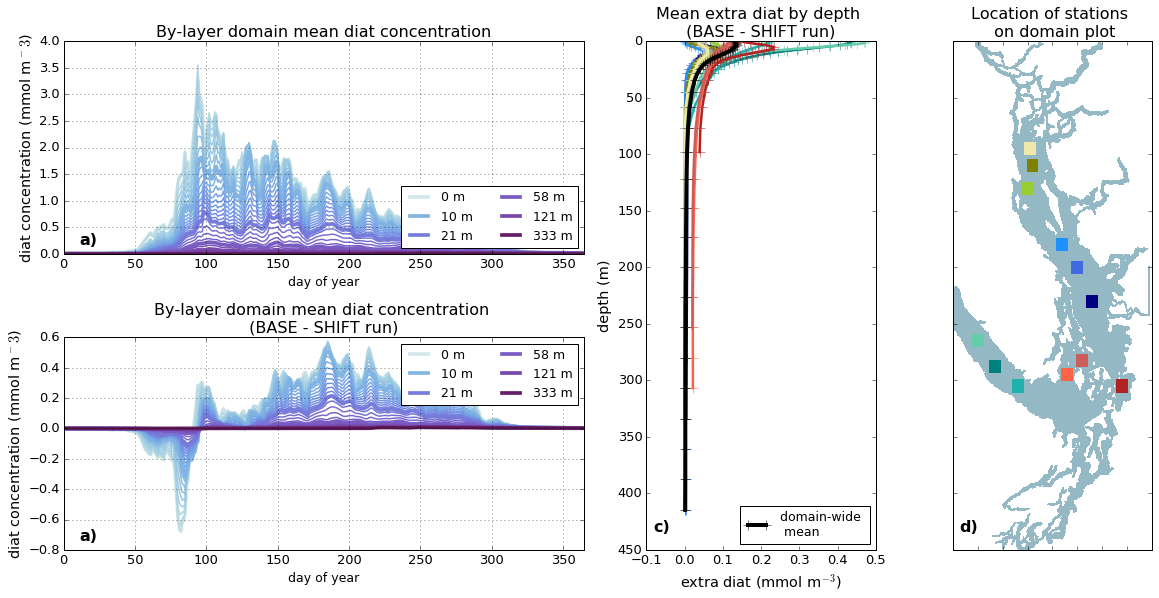

In [23]:
ts = 16 # title font
fs = 14.5 # all other font sizes
fact = 1
lw = 1.5
fig = plt.figure(figsize=(16.5*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_diat[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_diat[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])
#plt.ylim([1480,2180])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('diat concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean diat concentration', fontsize = ts)


ax1 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_diat[i,:]-TEPLO_diat[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_diat[i,:]-TEPLO_diat[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'upper right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])

plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('diat concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean diat concentration \n (BASE - SHIFT run) ', fontsize = ts)
ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BASE_dp = np.nanmean(BASE_diat, axis =1)
TEPLO_dp = np.nanmean(TEPLO_diat, axis =1)

BASE_jdf_dp = np.nanmean(BASE_diat_jdf, axis =1)
TEPLO_jdf_dp = np.nanmean(TEPLO_diat_jdf, axis =1)
BASE_cs_dp = np.nanmean(BASE_diat_cs, axis =1)
TEPLO_cs_dp = np.nanmean(TEPLO_diat_cs, axis =1)
BASE_ns_dp = np.nanmean(BASE_diat_ns, axis =1)
TEPLO_ns_dp = np.nanmean(TEPLO_diat_ns, axis =1)
BASE_haro_dp = np.nanmean(BASE_diat_haro, axis =1)
TEPLO_haro_dp = np.nanmean(TEPLO_diat_haro, axis =1)

BASE_jdf2_dp = np.nanmean(BASE_diat_jdf2, axis =1)
TEPLO_jdf2_dp = np.nanmean(TEPLO_diat_jdf2, axis =1)
BASE_cs2_dp = np.nanmean(BASE_diat_cs2, axis =1)
TEPLO_cs2_dp = np.nanmean(TEPLO_diat_cs2, axis =1)
BASE_ns2_dp = np.nanmean(BASE_diat_ns2, axis =1)
TEPLO_ns2_dp = np.nanmean(TEPLO_diat_ns2, axis =1)
BASE_haro2_dp = np.nanmean(BASE_diat_haro2, axis =1)
TEPLO_haro2_dp = np.nanmean(TEPLO_diat_haro2, axis =1)

BASE_jdf3_dp = np.nanmean(BASE_diat_jdf3, axis =1)
TEPLO_jdf3_dp = np.nanmean(TEPLO_diat_jdf3, axis =1)
BASE_cs3_dp = np.nanmean(BASE_diat_cs3, axis =1)
TEPLO_cs3_dp = np.nanmean(TEPLO_diat_cs3, axis =1)
BASE_ns3_dp = np.nanmean(BASE_diat_ns3, axis =1)
TEPLO_ns3_dp = np.nanmean(TEPLO_diat_ns3, axis =1)
BASE_haro3_dp = np.nanmean(BASE_diat_haro3, axis =1)
TEPLO_haro3_dp = np.nanmean(TEPLO_diat_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   

ax3.plot(BASE_jdf_dp-TEPLO_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf2_dp-TEPLO_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf3_dp-TEPLO_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BASE_cs_dp-TEPLO_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs2_dp-TEPLO_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs3_dp-TEPLO_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BASE_ns_dp-TEPLO_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns2_dp-TEPLO_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns3_dp-TEPLO_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BASE_haro_dp-TEPLO_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro2_dp-TEPLO_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro3_dp-TEPLO_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BASE_dp-TEPLO_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')


ax3.set_title('Mean extra diat by depth \n (BASE - SHIFT run) ', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra diat (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title('Location of stations \n on domain plot', fontsize = ts)

ax4.text(0.03, 0.03, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


fig.tight_layout()
#plt.savefig('Fig2.png')





NameError: name 'SHIFT_jdf_dp' is not defined

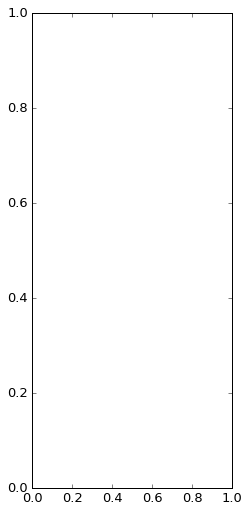

In [20]:
depths = mesh['gdept_1d'][:]
zdepth = depths[0] 

fig = plt.figure(figsize=(16.5*fact, 8.5*fact))

ax3 = plt.subplot2grid((1,4), (0,0), colspan=1, rowspan=1)
ax3.plot(BASE_jdf_dp-SHIFT_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf2_dp-SHIFT_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf3_dp-SHIFT_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,1), colspan=1, rowspan=1)
ax3.plot(BASE_cs_dp-SHIFT_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs2_dp-SHIFT_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs3_dp-SHIFT_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,2), colspan=1, rowspan=1)
ax3.plot(BASE_ns_dp-SHIFT_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns2_dp-SHIFT_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns3_dp-SHIFT_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,3), colspan=1, rowspan=1)
ax3.plot(BASE_haro_dp-SHIFT_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro2_dp-SHIFT_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro3_dp-SHIFT_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BASE_dp-SHIFT_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)
plt.suptitle('BASE-SHIFT', fontsize = fs+2)
plt.tight_layout()